### Figure 4
Compare precision & recall on full-length read identification

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from types import SimpleNamespace
from pathlib import Path
import subprocess
import scikit_posthocs as sp
import os
import scipy.stats as stats

os.makedirs("output", exist_ok=True)

### NanoPreP part

#### Do not rerun below

In [ ]:
# vars
path_workdir = Path("/home/b05b01002/HDD/project_nanoprep_re")
path_fl = lambda wildcards: \
    path_workdir / f"outputs/NanoPreP/mprof_nanoprep/beta{wildcards.beta}/{wildcards.recipe}_{wildcards.accuracy}/full-length.fq"
recipes = [
    "0.50-0.40-0.10",
    "0.50-0.45-0.05",
    "0.50-0.49-0.01",
    "0.50-0.50-0.00",
    "0.60-0.30-0.10",
    "0.60-0.35-0.05",
    "0.60-0.39-0.01",
    "0.60-0.40-0.00",
    "0.70-0.20-0.10",
    "0.70-0.25-0.05",
    "0.70-0.29-0.01",
    "0.70-0.30-0.00",
    "0.80-0.10-0.10",
    "0.80-0.15-0.05",
    "0.80-0.19-0.01",
    "0.80-0.20-0.00",
    "0.90-0.00-0.10",
    "0.90-0.05-0.05",
    "0.90-0.09-0.01",
    "0.90-0.10-0.00",
    "1.00-0.00-0.00"
]
accuracies = [
    "bad",
    "default",
    "very-good"
]
betas = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0", "1.5", "2.0"]

# function for counting reads
def count_reads(fastq_path):
    result = subprocess.run(["wc", "-l", fastq_path], capture_output=True, text=True, check=True)
    stdout_output = result.stdout
    return int(stdout_output.split(" ")[0]) / 4

def count_fl(fastq_path):
    cmd1 = ["grep", "type=fl", fastq_path]
    cmd2 = ["wc", "-l"]

    # Execute the first command
    process1 = subprocess.Popen(cmd1, stdout=subprocess.PIPE)

    # Execute the second command, piping the output of the first
    process2 = subprocess.Popen(cmd2, stdin=process1.stdout, stdout=subprocess.PIPE)

    # Close the stdout of the first process to prevent deadlocks
    process1.stdout.close()

    # Get the output and errors of the final command
    output, error = process2.communicate()

    return int(output)

In [ ]:
metrics = []
for beta in betas:
    print("beta: ", beta, end=" ")
    for rec in recipes:
        print(rec, end=" ")
        for acc in accuracies:
            # setup wildcards
            wildcards = SimpleNamespace(beta=beta, recipe=rec, accuracy=acc)

            # get file name
            fastq_path = path_fl(wildcards)

            # count full-length reads
            tp = count_fl(fastq_path)
            p = count_reads(fastq_path)
            precision = tp / p
            recall = tp / (100000 * float(rec.split("-")[0]))
            metrics.append([beta, rec, acc, precision, recall])
    print()

beta:  0.10.50-0.40-0.10 0.50-0.45-0.05 0.50-0.49-0.01 0.50-0.50-0.00 0.60-0.30-0.10 0.60-0.35-0.05 0.60-0.39-0.01 0.60-0.40-0.00 0.70-0.20-0.10 0.70-0.25-0.05 0.70-0.29-0.01 0.70-0.30-0.00 0.80-0.10-0.10 0.80-0.15-0.05 0.80-0.19-0.01 0.80-0.20-0.00 0.90-0.00-0.10 0.90-0.05-0.05 0.90-0.09-0.01 0.90-0.10-0.00 1.00-0.00-0.00 
beta:  0.20.50-0.40-0.10 0.50-0.45-0.05 0.50-0.49-0.01 0.50-0.50-0.00 0.60-0.30-0.10 0.60-0.35-0.05 0.60-0.39-0.01 0.60-0.40-0.00 0.70-0.20-0.10 0.70-0.25-0.05 0.70-0.29-0.01 0.70-0.30-0.00 0.80-0.10-0.10 0.80-0.15-0.05 0.80-0.19-0.01 0.80-0.20-0.00 0.90-0.00-0.10 0.90-0.05-0.05 0.90-0.09-0.01 0.90-0.10-0.00 1.00-0.00-0.00 
beta:  0.30.50-0.40-0.10 0.50-0.45-0.05 0.50-0.49-0.01 0.50-0.50-0.00 0.60-0.30-0.10 0.60-0.35-0.05 0.60-0.39-0.01 0.60-0.40-0.00 0.70-0.20-0.10 0.70-0.25-0.05 0.70-0.29-0.01 0.70-0.30-0.00 0.80-0.10-0.10 0.80-0.15-0.05 0.80-0.19-0.01 0.80-0.20-0.00 0.90-0.00-0.10 0.90-0.05-0.05 0.90-0.09-0.01 0.90-0.10-0.00 1.00-0.00-0.00 
beta:  0.40.50-0.40-0.

In [ ]:
metrics_df = pd.DataFrame(metrics)
metrics_df.columns = ["beta", "recipe", "accuracy", "precision", "recall"]
metrics_df["software"] = "nanoprep"
# metrics_df.to_csv("metrics.csv")

#### Do not rerun above

### Pychopper part

In [ ]:
path_workdir = Path("/home/b05b01002/HDD/project_nanoprep_re")
path_fl = lambda wildcards: \
    path_workdir / f"outputs/Pychopper/mprof_pychopper/{wildcards.backend}/{wildcards.recipe}_{wildcards.accuracy}/full-length.fq"
recipes = [
    "0.50-0.40-0.10",
    "0.50-0.45-0.05",
    "0.50-0.49-0.01",
    "0.50-0.50-0.00",
    "0.60-0.30-0.10",
    "0.60-0.35-0.05",
    "0.60-0.39-0.01",
    "0.60-0.40-0.00",
    "0.70-0.20-0.10",
    "0.70-0.25-0.05",
    "0.70-0.29-0.01",
    "0.70-0.30-0.00",
    "0.80-0.10-0.10",
    "0.80-0.15-0.05",
    "0.80-0.19-0.01",
    "0.80-0.20-0.00",
    "0.90-0.00-0.10",
    "0.90-0.05-0.05",
    "0.90-0.09-0.01",
    "0.90-0.10-0.00",
    "1.00-0.00-0.00"
]
accuracies = [
    "bad",
    "default",
    "very-good"
]
backends = ["phmm", "edlib"]

# function for counting reads
def count_reads(fastq_path):
    result = subprocess.run(["wc", "-l", fastq_path], capture_output=True, text=True, check=True)
    stdout_output = result.stdout
    return int(stdout_output.split(" ")[0]) / 4

def count_fl(fastq_path):
    cmd1 = ["grep", "type=fl", fastq_path]
    cmd2 = ["wc", "-l"]

    # Execute the first command
    process1 = subprocess.Popen(cmd1, stdout=subprocess.PIPE)

    # Execute the second command, piping the output of the first
    process2 = subprocess.Popen(cmd2, stdin=process1.stdout, stdout=subprocess.PIPE)

    # Close the stdout of the first process to prevent deadlocks
    process1.stdout.close()

    # Get the output and errors of the final command
    output, error = process2.communicate()

    return int(output)

In [14]:
metrics = []
for backend in backends:
    print("backend: ", backend, end=" ")
    for rec in recipes:
        print(rec, end=" ")
        for acc in accuracies:
            # setup wildcards
            wildcards = SimpleNamespace(backend=backend, recipe=rec, accuracy=acc)

            # get file name
            fastq_path = path_fl(wildcards)

            # count full-length reads
            tp = count_fl(fastq_path)
            p = count_reads(fastq_path)
            precision = tp / p
            recall = tp / (100000 * float(rec.split("-")[0]))
            metrics.append([backend, rec, acc, precision, recall])
    print()

beta:  phmm 0.50-0.40-0.10 0.50-0.45-0.05 0.50-0.49-0.01 0.50-0.50-0.00 0.60-0.30-0.10 0.60-0.35-0.05 0.60-0.39-0.01 0.60-0.40-0.00 0.70-0.20-0.10 0.70-0.25-0.05 0.70-0.29-0.01 0.70-0.30-0.00 0.80-0.10-0.10 0.80-0.15-0.05 0.80-0.19-0.01 0.80-0.20-0.00 0.90-0.00-0.10 0.90-0.05-0.05 0.90-0.09-0.01 0.90-0.10-0.00 1.00-0.00-0.00 
beta:  edlib 0.50-0.40-0.10 0.50-0.45-0.05 0.50-0.49-0.01 0.50-0.50-0.00 0.60-0.30-0.10 0.60-0.35-0.05 0.60-0.39-0.01 0.60-0.40-0.00 0.70-0.20-0.10 0.70-0.25-0.05 0.70-0.29-0.01 0.70-0.30-0.00 0.80-0.10-0.10 0.80-0.15-0.05 0.80-0.19-0.01 0.80-0.20-0.00 0.90-0.00-0.10 0.90-0.05-0.05 0.90-0.09-0.01 0.90-0.10-0.00 1.00-0.00-0.00 


In [15]:
metrics_df = pd.DataFrame(metrics)
metrics_df.columns = ["backend", "recipe", "accuracy", "precision", "recall"]
metrics_df["software"] = "pychopper"
metrics_df.to_csv("metrics_pychopper.csv")

# Visualize NanoPreP and Pychopper results

In [61]:
def pairwise_wilcoxon(metrics_df, index=["recipe", "accuracy"], columns=["beta_or_backend"], value="precision"):
    pivot_data = metrics_df.pivot(index=index, columns=columns, values=[value])
    col_values = list(pivot_data[value].columns)
    p_vals = {}
    for x in col_values:
        p_vals[x] = []
        for y in ["phmm", "edlib"]:
            # skip against self
            if y == x:
                p_vals[x].append(-1)
                continue
            
            # test
            statistic, p_val = stats.wilcoxon(
                x=pivot_data[(value, x)],
                y=pivot_data[(value, y)],
                alternative="greater"
            )
            
            # record p value
            p_vals[x].append(p_val)
    
    # create output df
    col_order = col_values
    col_order.remove("phmm")
    col_order.remove("edlib")
    col_order = ["phmm", "edlib"] + col_order
    out = pd.DataFrame(p_vals)
    out.index = ["phmm", "edlib"]
    out = out.loc[:, col_order]
    
    # correct p-value
    uncorrected = []
    position = []
    for i in list(out.index):
        for j in list(out.columns):
            if out.loc[i, j] > 0:
                uncorrected.append(out.loc[i, j])
                position.append((i, j))
    corrected = stats.false_discovery_control(uncorrected, method="bh")
    for pos, p_adj in zip(position, corrected):
        out.loc[pos] = p_adj
        
    return out

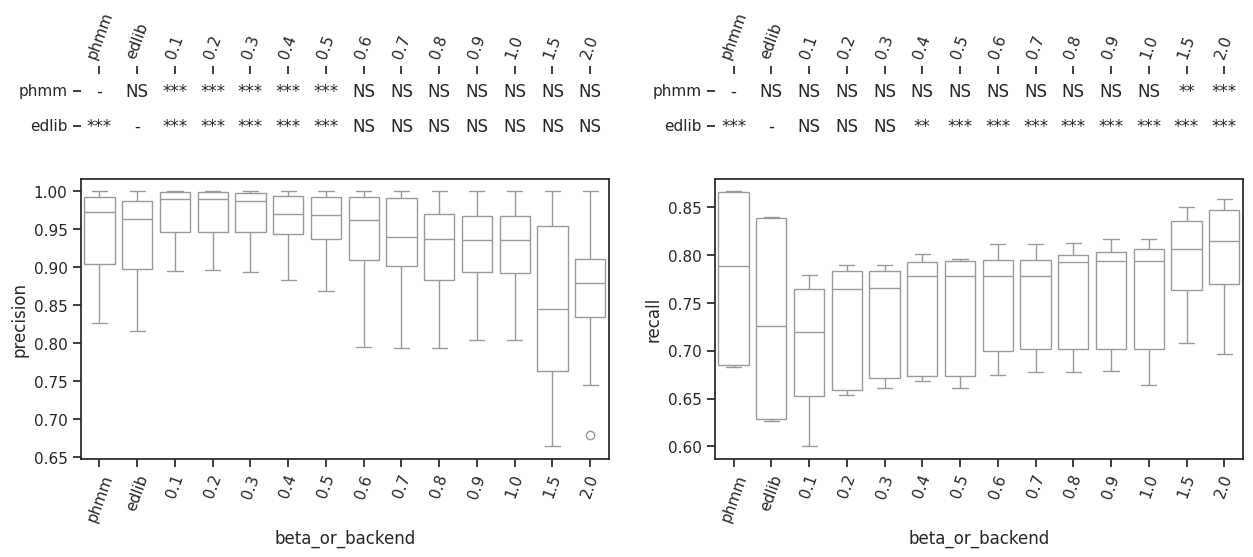

In [62]:
#
metrics_np = pd.read_csv("metrics.csv")
metrics_py = pd.read_csv("metrics_pychopper.csv")

#
metrics_np = metrics_np.rename(columns={"beta": "beta_or_backend"})
metrics_py = metrics_py.rename(columns={"backend": "beta_or_backend"})

#
metrics_df = pd.concat([metrics_py, metrics_np])
metrics_df["f1"] = metrics_df.apply(lambda x: (2 * x.precision * x.recall) / (x.precision + x.recall), axis=1)
metrics_df["percent_fl"] = metrics_df["recipe"].apply(lambda x: float(x.split("-")[0]))
metrics_df["percent_fu"] = metrics_df["recipe"].apply(lambda x: float(x.split("-")[2]))


# Initialize FacetGrid
sns.set_theme(style="white",)
sns.set_style("ticks")
fig, axes = plt.subplots(2, 2, figsize=(15, 5), gridspec_kw={"width_ratios": [1, 1], "height_ratios": [1, 4]})
sns.boxplot(
    metrics_df,
    x="beta_or_backend",
    y="precision",
    color="white",
    ax=axes[1][0],
)
sns.boxplot(
    metrics_df,
    x="beta_or_backend",
    y="recall",
    color="white",
    ax=axes[1][1]
)
# Wilcoxon (Precision)
res = pairwise_wilcoxon(metrics_df, value="precision")
out = sp.sign_table(res)
res.to_csv("output/wilcoxon_signed_rank_precision.csv")
sns.heatmap(
    res,
    annot=out,
    fmt="s",
    cmap=ListedColormap(["white"]),
    cbar=False,
    ax=axes[0][0]
)

# Wilcoxon (Recall)
res = pairwise_wilcoxon(metrics_df, value="recall")
out = sp.sign_table(res)
res.to_csv("output/wilcoxon_signed_rank_recall.csv")
sns.heatmap(
    res,
    annot=out,
    fmt="s",
    cmap=ListedColormap(["white"]),
    cbar=False,
    ax=axes[0][1]
)

axes[0][0].xaxis.tick_top()
axes[0][1].xaxis.tick_top()
axes[0][0].xaxis.set_tick_params(rotation=70)
axes[0][1].xaxis.set_tick_params(rotation=70)
axes[1][0].xaxis.set_tick_params(rotation=70)
axes[1][1].xaxis.set_tick_params(rotation=70)
# axes[1].legend(title="Read quality",loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

plt.show()
fig.savefig("output/metrics.svg")

High quality only

/home/b05b01002/Installed/miniconda3/envs/python-dev/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/b05b01002/Installed/miniconda3/envs/python-dev/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


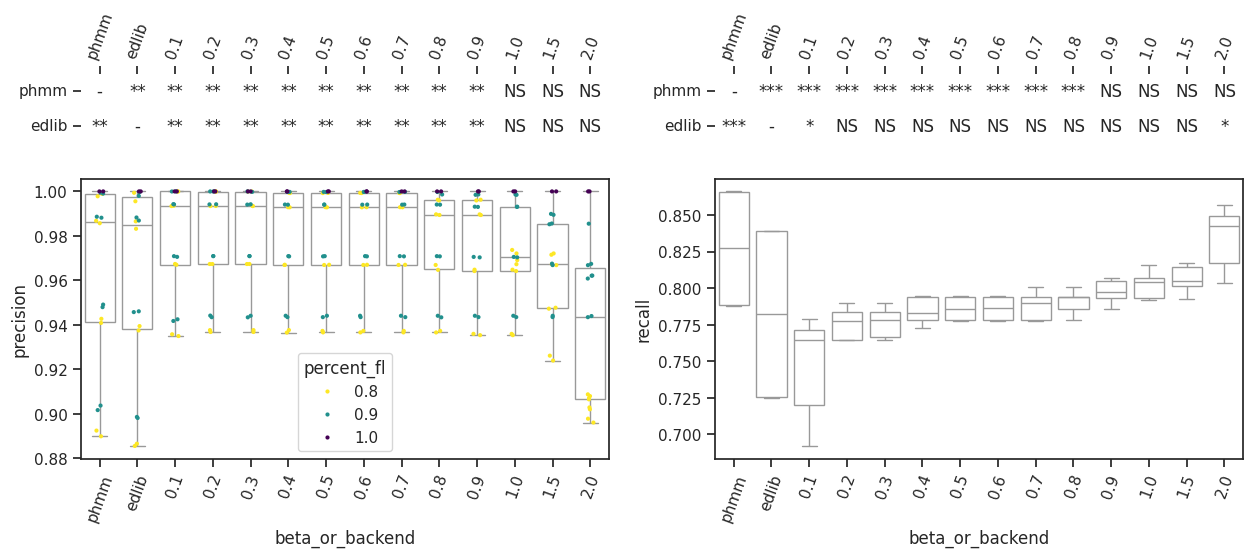

In [6]:
#
metrics_np = pd.read_csv("metrics.csv")
metrics_py = pd.read_csv("metrics_pychopper.csv")

#
metrics_np = metrics_np.rename(columns={"beta": "beta_or_backend"})
metrics_py = metrics_py.rename(columns={"backend": "beta_or_backend"})

#
metrics_df = pd.concat([metrics_py, metrics_np])
metrics_df["f1"] = metrics_df.apply(lambda x: (2 * x.precision * x.recall) / (x.precision + x.recall), axis=1)
metrics_df["percent_fl"] = metrics_df["recipe"].apply(lambda x: float(x.split("-")[0]))
metrics_df["percent_fu"] = metrics_df["recipe"].apply(lambda x: float(x.split("-")[2]))


#
metrics_df = metrics_df[(metrics_df["accuracy"] != "bad") & (metrics_df["percent_fl"] >= .8)]

# Initialize FacetGrid
sns.set_theme(style="white",)
sns.set_style("ticks")
fig, axes = plt.subplots(2, 2, figsize=(15, 5), gridspec_kw={"width_ratios": [1, 1], "height_ratios": [1, 4]})
sns.boxplot(
    metrics_df,
    x="beta_or_backend",
    y="precision",
    color="white",
    ax=axes[1][0],
)
sns.stripplot(
    metrics_df,
    x="beta_or_backend",
    y="precision",
    hue="percent_fl",
    palette="viridis_r",
    s=3,
    ax=axes[1][0],
)
sns.boxplot(
    metrics_df,
    x="beta_or_backend",
    y="recall",
    color="white",
    ax=axes[1][1]
)
# Wilcoxon (Precision)
res = sp.posthoc_wilcoxon(
    metrics_df,
    val_col="precision",
    group_col="beta_or_backend",
    zero_method="zsplit",
    p_adjust="fdr_bh"
)
out = sp.sign_table(res.loc[["phmm", "edlib"], :])
res.to_csv("output/wilcoxon_signed_rank_precision_hq.csv")
sns.heatmap(
    res.loc[["phmm", "edlib"]],
    annot=out,
    fmt="s",
    cmap=ListedColormap(['white']),
    cbar=False,
    ax=axes[0][0]
)

# Wilcoxon (Recall)
res = sp.posthoc_wilcoxon(
    metrics_df,
    val_col="recall",
    group_col="beta_or_backend",
    zero_method="zsplit",
    p_adjust="fdr_bh"
)
out = sp.sign_table(res.loc[["phmm", "edlib"], :])
res.to_csv("output/wilcoxon_signed_rank_recall_hq.csv")
sns.heatmap(
    res.loc[["phmm", "edlib"]],
    annot=out,
    fmt="s",
    cmap=ListedColormap(['white']),
    cbar=False,
    ax=axes[0][1]
)

axes[0][0].xaxis.tick_top()
axes[0][1].xaxis.tick_top()
axes[0][0].xaxis.set_tick_params(rotation=70)
axes[0][1].xaxis.set_tick_params(rotation=70)
axes[1][0].xaxis.set_tick_params(rotation=70)
axes[1][1].xaxis.set_tick_params(rotation=70)
# axes[1].legend(title="Read quality",loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

plt.show()
fig.savefig("output/metrics_HQ.svg")

/home/b05b01002/Installed/miniconda3/envs/python-dev/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/b05b01002/Installed/miniconda3/envs/python-dev/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/b05b01002/Installed/miniconda3/envs/python-dev/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/b05b01002/Installed/miniconda3/envs/python-dev/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximat

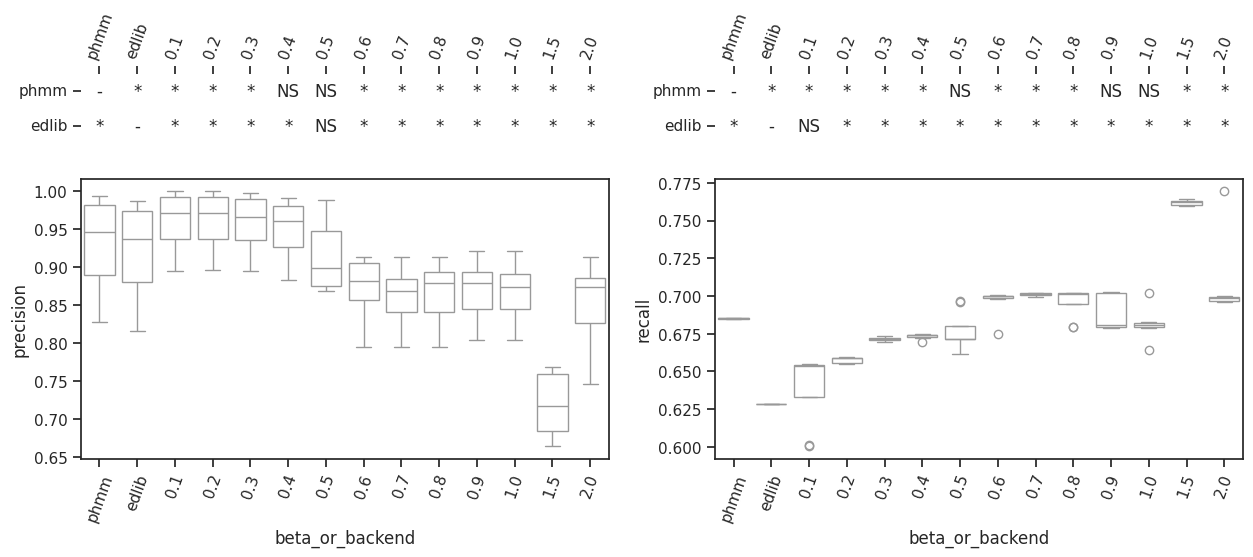

In [35]:
#
metrics_np = pd.read_csv("metrics.csv")
metrics_py = pd.read_csv("metrics_pychopper.csv")

#
metrics_np = metrics_np.rename(columns={"beta": "beta_or_backend"})
metrics_py = metrics_py.rename(columns={"backend": "beta_or_backend"})

#
metrics_df = pd.concat([metrics_py, metrics_np])
metrics_df["f1"] = metrics_df.apply(lambda x: (2 * x.precision * x.recall) / (x.precision + x.recall), axis=1)
metrics_df["percent_fl"] = metrics_df["recipe"].apply(lambda x: float(x.split("-")[0]))
metrics_df["percent_fu"] = metrics_df["recipe"].apply(lambda x: float(x.split("-")[2]))


#
metrics_df = metrics_df[(metrics_df["accuracy"] == "bad") & (metrics_df["percent_fl"] <= .6)]

# Initialize FacetGrid
sns.set_theme(style="white",)
sns.set_style("ticks")
fig, axes = plt.subplots(2, 2, figsize=(15, 5), gridspec_kw={"width_ratios": [1, 1], "height_ratios": [1, 4]})
sns.boxplot(
    metrics_df,
    x="beta_or_backend",
    y="precision",
    color="white",
    ax=axes[1][0],
)
sns.boxplot(
    metrics_df,
    x="beta_or_backend",
    y="recall",
    color="white",
    ax=axes[1][1]
)
# Wilcoxon (Precision)
res = sp.posthoc_wilcoxon(
    metrics_df,
    val_col="precision",
    group_col="beta_or_backend",
    zero_method="zsplit",
    p_adjust="fdr_bh"
)
out = sp.sign_table(res.loc[["phmm", "edlib"], :])
res.to_csv("output/wilcoxon_signed_rank_precision_lq.csv")
sns.heatmap(
    res.loc[["phmm", "edlib"]],
    annot=out,
    fmt="s",
    cmap=ListedColormap(['white']),
    cbar=False,
    ax=axes[0][0]
)

# Wilcoxon (Recall)
res = sp.posthoc_wilcoxon(
    metrics_df,
    val_col="recall",
    group_col="beta_or_backend",
    zero_method="zsplit",
    p_adjust="fdr_bh"
)
out = sp.sign_table(res.loc[["phmm", "edlib"], :])
res.to_csv("output/wilcoxon_signed_rank_recall_lq.csv")
sns.heatmap(
    res.loc[["phmm", "edlib"]],
    annot=out,
    fmt="s",
    cmap=ListedColormap(['white']),
    cbar=False,
    ax=axes[0][1]
)

axes[0][0].xaxis.tick_top()
axes[0][1].xaxis.tick_top()
axes[0][0].xaxis.set_tick_params(rotation=70)
axes[0][1].xaxis.set_tick_params(rotation=70)
axes[1][0].xaxis.set_tick_params(rotation=70)
axes[1][1].xaxis.set_tick_params(rotation=70)
# axes[1].legend(title="Read quality",loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

plt.show()
fig.savefig("output/metrics_LQ.svg")